# Projet Ingénieurie des données

Importation des bibliothèques

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

## Création du jeu de données principal

In [25]:
client_df_brut = pd.read_csv("X.csv", delimiter=",")
batiment_df_brut = pd.read_csv("Y.csv", delimiter=",")
full_df_brut = pd.merge(client_df_brut, batiment_df_brut, on='Identifiant')  

On fusionne les deux dataframes car ils disposent d'un dénominateur commun: l'identifiant du contrat. Les dataframes ont le même nombre de ligne (10229).

# Etape 1: nettoyage du dataframe
## Suppression des colonnes indiquant le numero de la ligne

In [26]:
clean_df = full_df_brut.drop("Unnamed: 0_x", axis=1)
clean_df = clean_df.drop("Unnamed: 0_y", axis=1)

On se sert des identifiant pour identifier les batiments, ils sont uniques à chaque batiment

In [27]:
print(clean_df["Identifiant"].is_unique)

True


Verification des valeurs nulles

In [28]:
print(clean_df.isnull().sum())

Identifiant       0
ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
target            0
dtype: int64


Colonnes Insee, superficief et ft_22_categ comportent des valeurs nulles.

In [29]:
percet_of_nullable_values = (clean_df["ft_22_categ"].isnull().sum() / clean_df.shape[0]) * 100 # 12% de valeur nulles pour ft_22_categ, l'analyse de cette variable semble difficle. Cependant, elle est notée comme importante, on supprime les lignes ou la valeur vaut null
clean_df = clean_df.dropna(subset=['ft_22_categ'])

12% de valeur nulles pour ft_22_categ, l'analyse de cette variable semble difficle. Cependant, elle est notée comme importante, on supprime les lignes ou la valeur vaut null

In [30]:
clean_df.isnull().sum()

Identifiant      0
ft_2_categ       0
EXPO             0
ft_4_categ       0
ft_5_categ       0
ft_6_categ       0
ft_7_categ       0
ft_8_categ       0
ft_9_categ       0
ft_10_categ      0
ft_11_categ      0
ft_12_categ      0
ft_13_categ      0
ft_14_categ      0
ft_15_categ      0
ft_16_categ      0
ft_17_categ      0
ft_18_categ      0
ft_19_categ      0
superficief    115
ft_21_categ      0
ft_22_categ      0
ft_23_categ      0
ft_24_categ      0
Insee          115
target           0
dtype: int64

In [31]:
print(clean_df[clean_df['superficief'].isna()])
nullable_lines = clean_df.loc[clean_df['superficief'].isnull() & clean_df['Insee'].isnull()]
print(nullable_lines)

       Identifiant  ft_2_categ         EXPO  ft_4_categ ft_5_categ ft_6_categ  \
15           14454        2013            1           1          V          V   
33           17151        2012            1           0          V          V   
37           11721        2012            1           0          V          V   
45           15994        2012            1           1          V          V   
136           5078        2013            1           1          V          V   
...            ...         ...          ...         ...        ...        ...   
9711         15067        2012            1           0          V          V   
9729         17650        2012            1           1          V          V   
10007        17249        2012            1           0          V          V   
10071           48        2014  0,030136986           0          V          V   
10124        15812        2012            1           0          V          V   

      ft_7_categ ft_8_categ

Dans la plupart des cas si le code Insee est null alors la superficie aussi, les variables sont en correlation sur ce ce point. On peut donc supprimer ces lignes

In [32]:
clean_df = clean_df.dropna(subset=['superficief', 'Insee'])
print(clean_df.isnull().sum())

Identifiant    0
ft_2_categ     0
EXPO           0
ft_4_categ     0
ft_5_categ     0
ft_6_categ     0
ft_7_categ     0
ft_8_categ     0
ft_9_categ     0
ft_10_categ    0
ft_11_categ    0
ft_12_categ    0
ft_13_categ    0
ft_14_categ    0
ft_15_categ    0
ft_16_categ    0
ft_17_categ    0
ft_18_categ    0
ft_19_categ    0
superficief    0
ft_21_categ    0
ft_22_categ    0
ft_23_categ    0
ft_24_categ    0
Insee          0
target         0
dtype: int64


plus aucunes valeurs nulles

# Etape n°2: Typage des variables

In [33]:
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8878 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  8878 non-null   int64  
 1   ft_2_categ   8878 non-null   int64  
 2   EXPO         8878 non-null   object 
 3   ft_4_categ   8878 non-null   int64  
 4   ft_5_categ   8878 non-null   object 
 5   ft_6_categ   8878 non-null   object 
 6   ft_7_categ   8878 non-null   object 
 7   ft_8_categ   8878 non-null   object 
 8   ft_9_categ   8878 non-null   object 
 9   ft_10_categ  8878 non-null   object 
 10  ft_11_categ  8878 non-null   object 
 11  ft_12_categ  8878 non-null   object 
 12  ft_13_categ  8878 non-null   object 
 13  ft_14_categ  8878 non-null   object 
 14  ft_15_categ  8878 non-null   object 
 15  ft_16_categ  8878 non-null   object 
 16  ft_17_categ  8878 non-null   object 
 17  ft_18_categ  8878 non-null   object 
 18  ft_19_categ  8878 non-null   int64  
 19  superficie

Transformation de la valuer cible en booleen

In [34]:
clean_df['target'] = clean_df['target'].astype('int64').astype(object)

Transformation de la valuer EXPO en Flotant

In [35]:
clean_df['EXPO'] = clean_df['EXPO'].str.replace(',', '.').astype(float)

print(clean_df.info())
print(clean_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 8878 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  8878 non-null   int64  
 1   ft_2_categ   8878 non-null   int64  
 2   EXPO         8878 non-null   float64
 3   ft_4_categ   8878 non-null   int64  
 4   ft_5_categ   8878 non-null   object 
 5   ft_6_categ   8878 non-null   object 
 6   ft_7_categ   8878 non-null   object 
 7   ft_8_categ   8878 non-null   object 
 8   ft_9_categ   8878 non-null   object 
 9   ft_10_categ  8878 non-null   object 
 10  ft_11_categ  8878 non-null   object 
 11  ft_12_categ  8878 non-null   object 
 12  ft_13_categ  8878 non-null   object 
 13  ft_14_categ  8878 non-null   object 
 14  ft_15_categ  8878 non-null   object 
 15  ft_16_categ  8878 non-null   object 
 16  ft_17_categ  8878 non-null   object 
 17  ft_18_categ  8878 non-null   object 
 18  ft_19_categ  8878 non-null   int64  
 19  superficie

Analyse variables quantitatives

In [36]:
for col in clean_df.select_dtypes('object'):
    print(f'{col :-<20} {clean_df[col].unique()}')

ft_5_categ---------- ['V' 'N' 'O']
ft_6_categ---------- ['N' 'V' 'O']
ft_7_categ---------- ['1' 'V' '2' '3']
ft_8_categ---------- ['O' 'V' 'N']
ft_9_categ---------- ['1' 'V' '2' '3']
ft_10_categ--------- ['O' 'V' 'N']
ft_11_categ--------- ['N' 'V' 'O']
ft_12_categ--------- ['N' 'V' 'O']
ft_13_categ--------- ['N' 'V' 'O']
ft_14_categ--------- ['N' 'V' 'O']
ft_15_categ--------- ['AUTRE' 'V']
ft_16_categ--------- ['IDENTIQUE' 'V']
ft_17_categ--------- ['V' 'N' 'O']
ft_18_categ--------- ['base' 'effpi' 'pi' 'eff' 'V']
ft_23_categ--------- ['0.0' '0.3' '0.6' '1.0' '2.0' '1.5']
ft_24_categ--------- ['   2' '   .' '   4' '   3' '   5' '   8' '>=10' '   1' '   6' '   7'
 '   9']
Insee--------------- ['65440' '14341' '59340' ... '38484' '73094' '78073']
target-------------- [0 1]


In [37]:
clean_df['ft_23_categ'] = clean_df['ft_23_categ'].astype(float)
clean_df['Insee'] = clean_df['Insee'].str.slice(0, 2)
print(clean_df['Insee'])


0        65
1        14
4        59
5        13
6        33
         ..
10223    73
10224    76
10225    78
10227    64
10228    06
Name: Insee, Length: 8878, dtype: object


Graphiques quanti

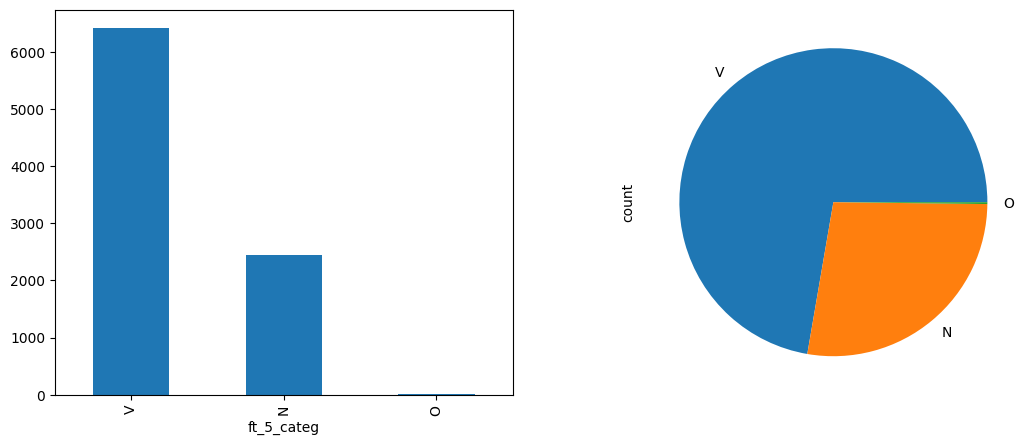

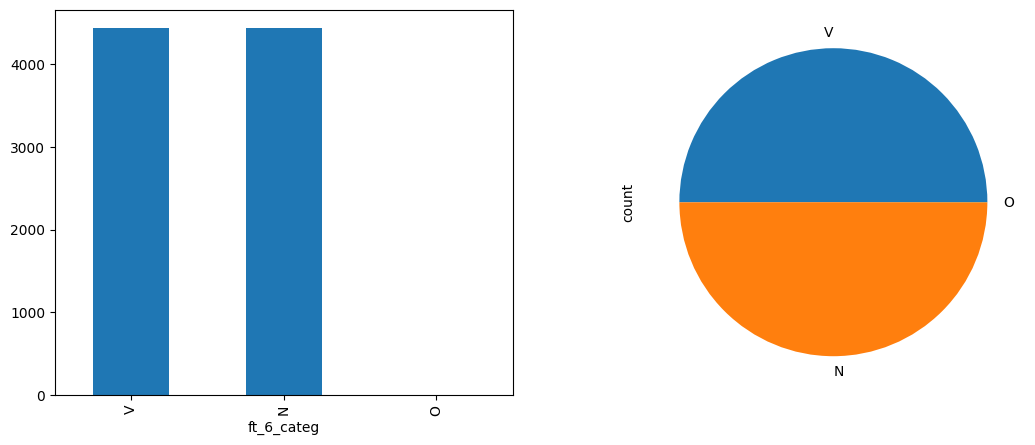

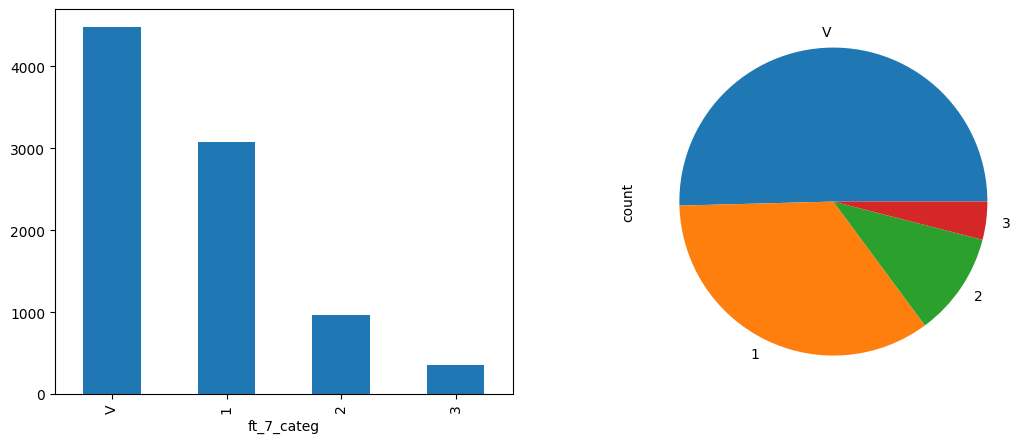

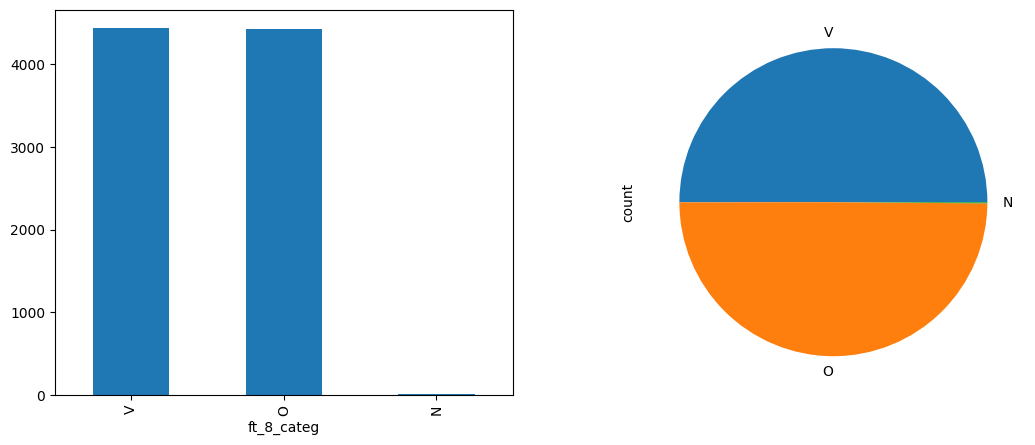

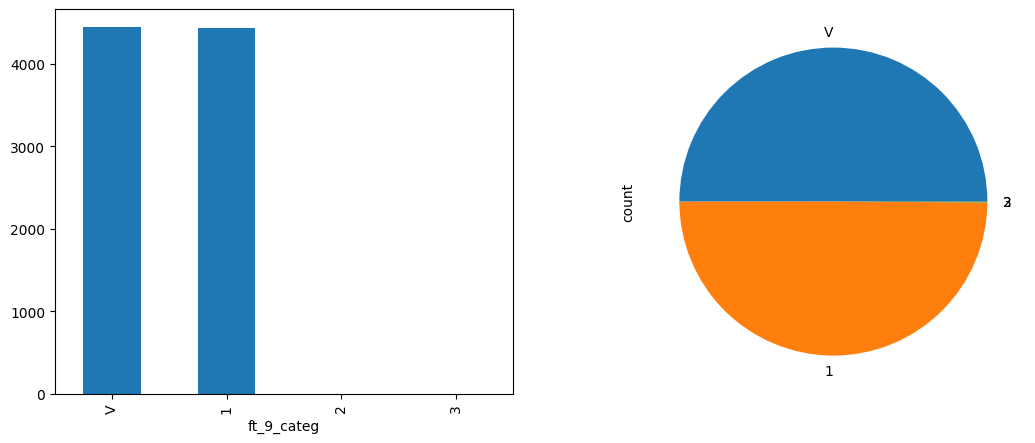

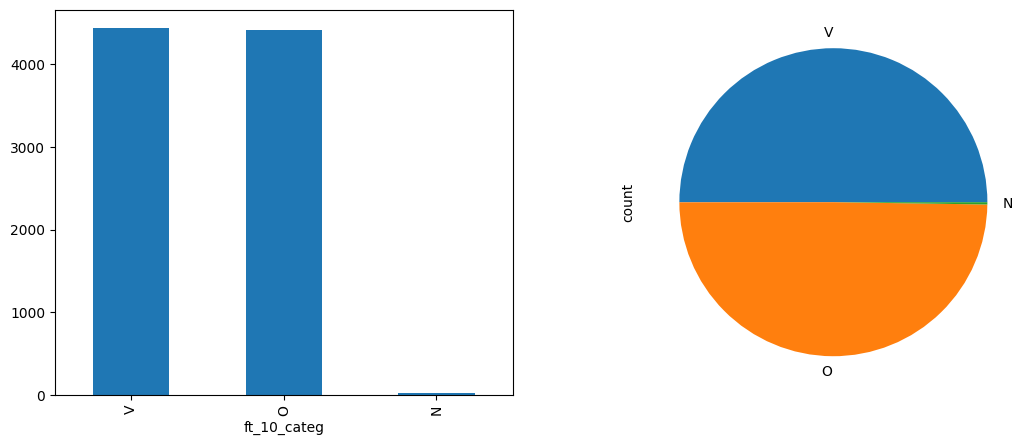

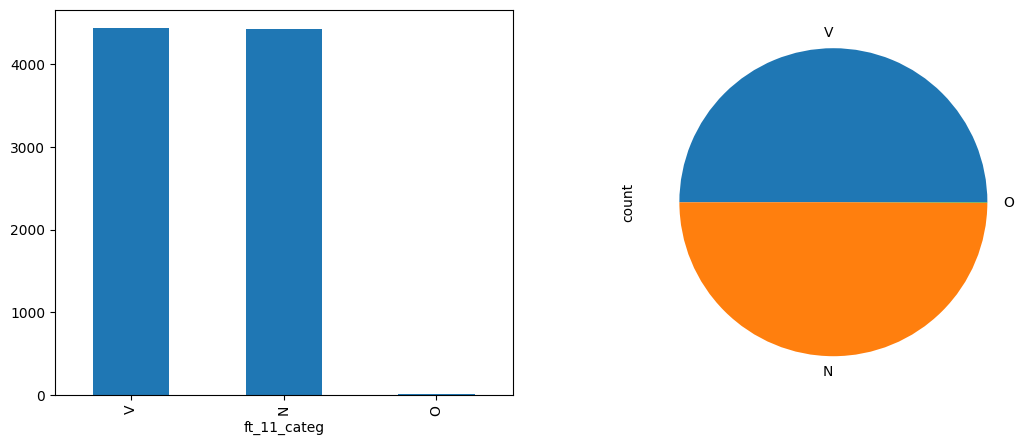

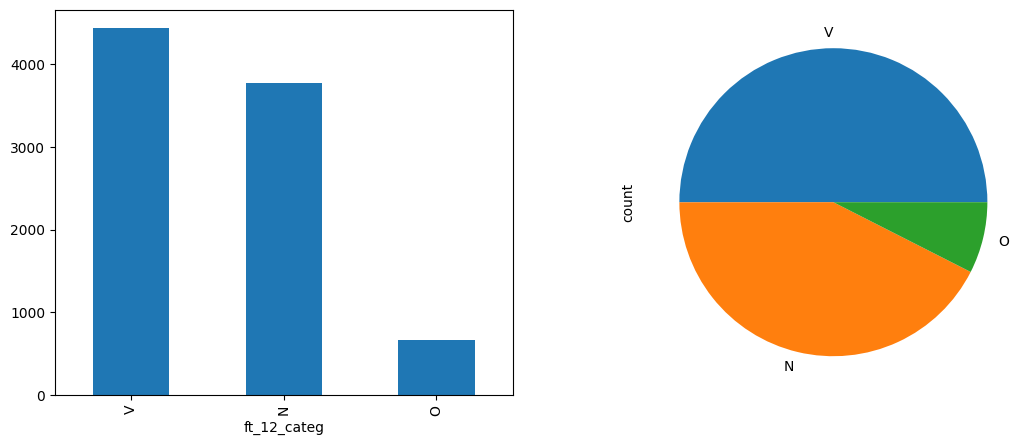

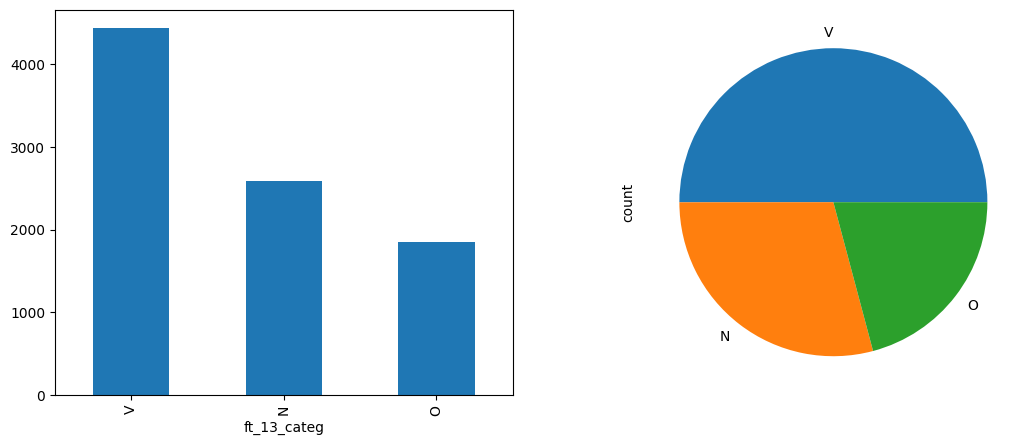

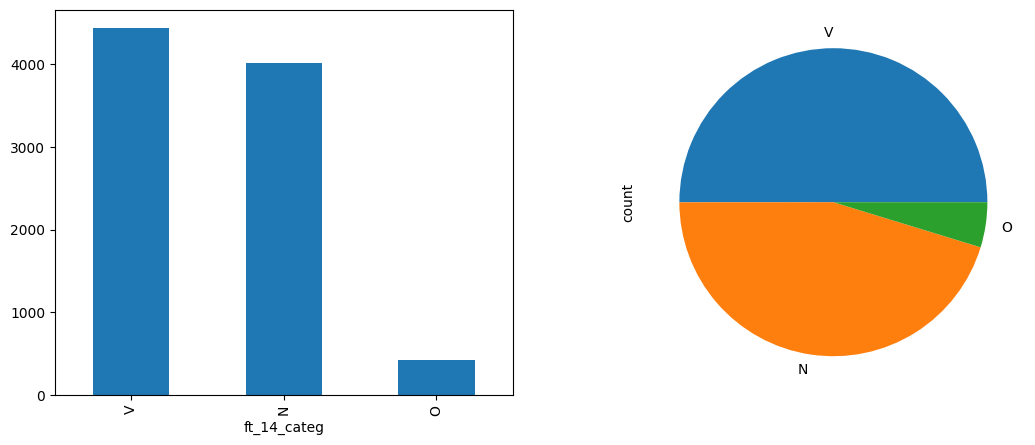

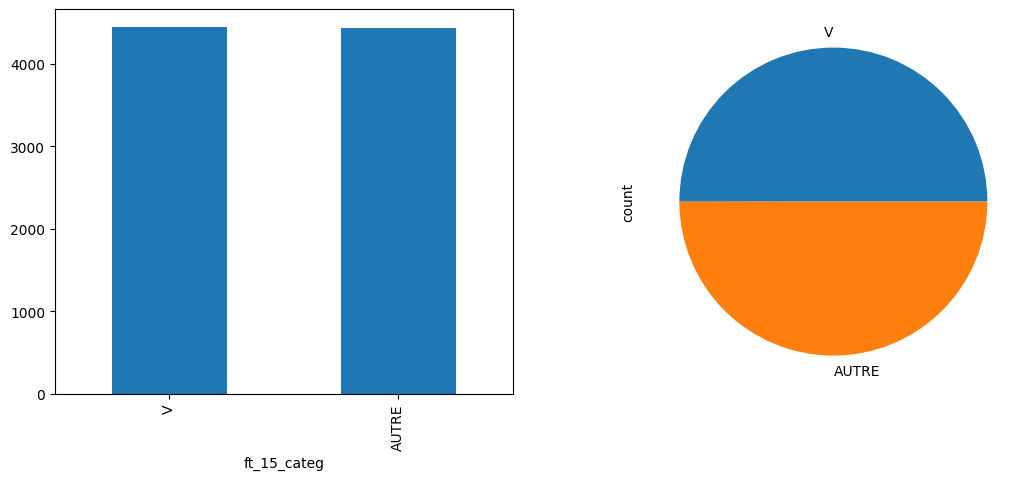

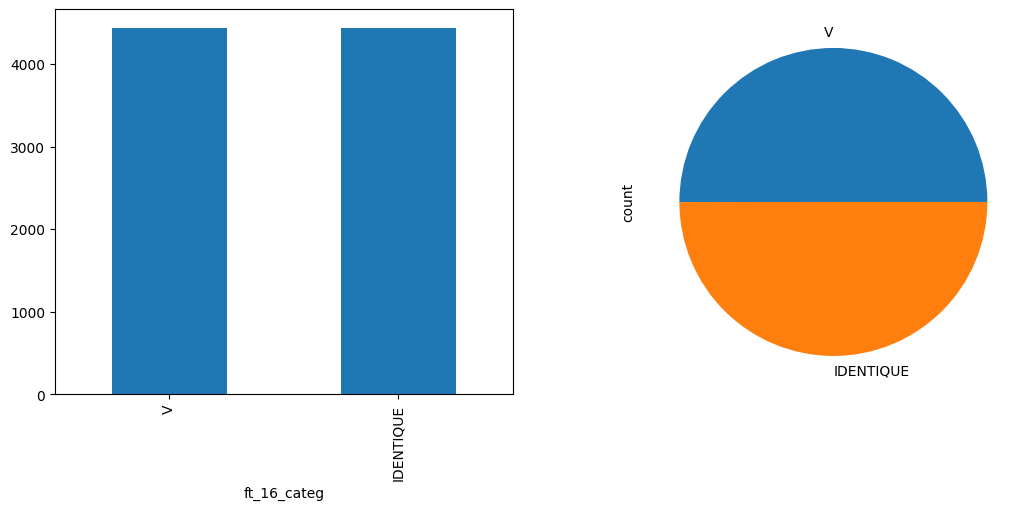

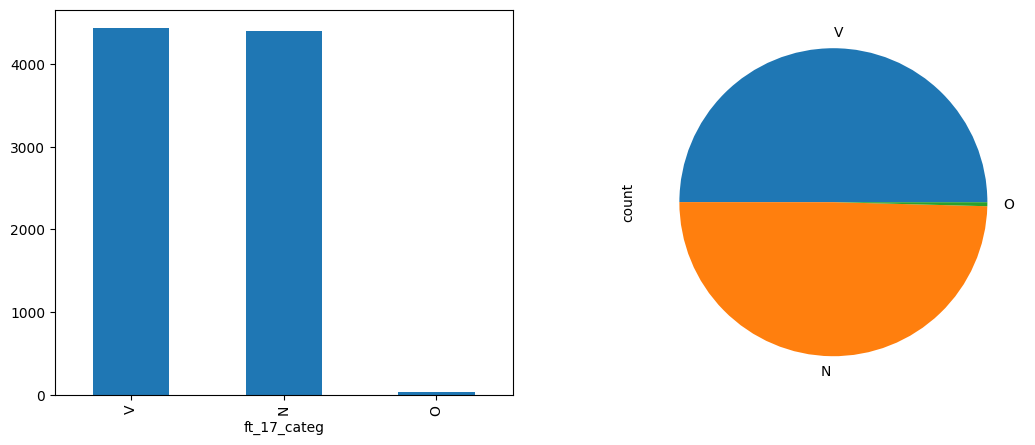

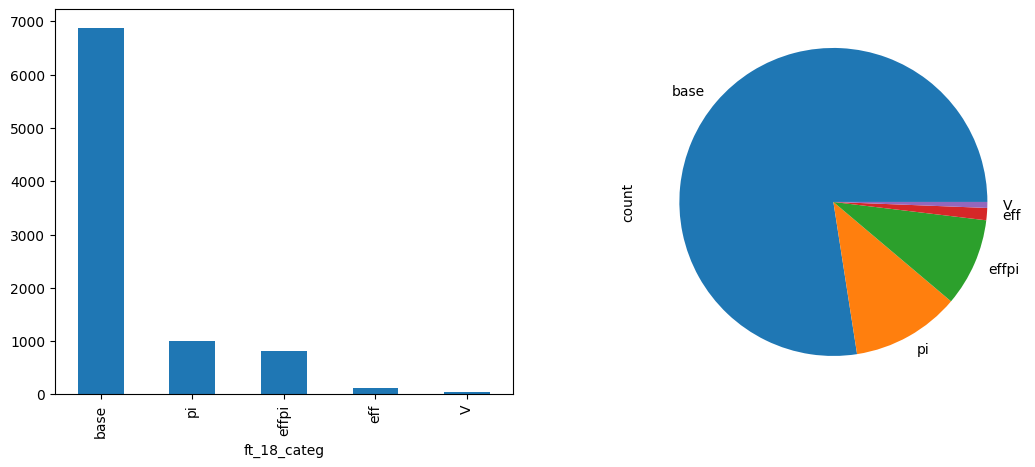

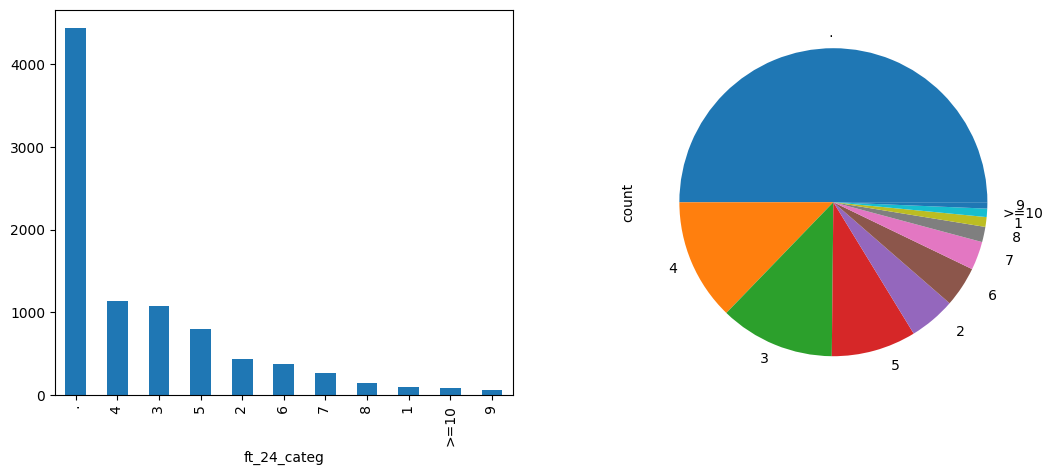

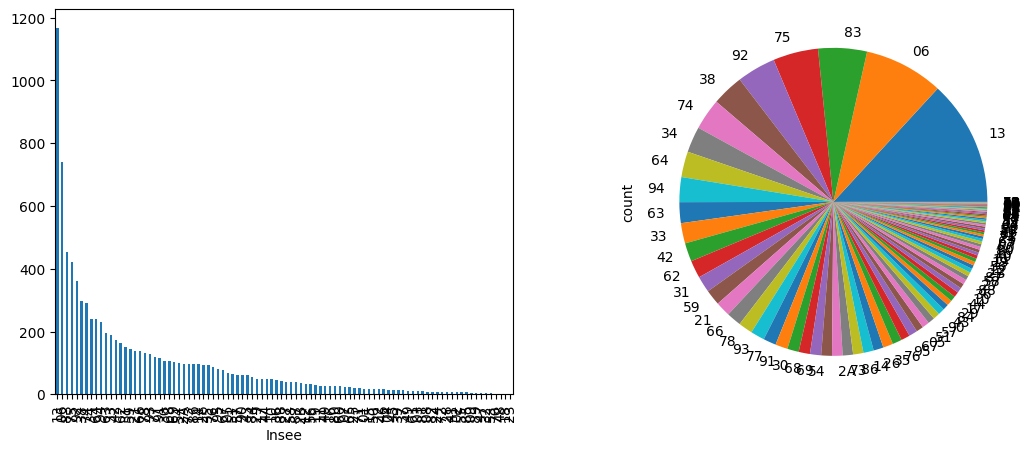

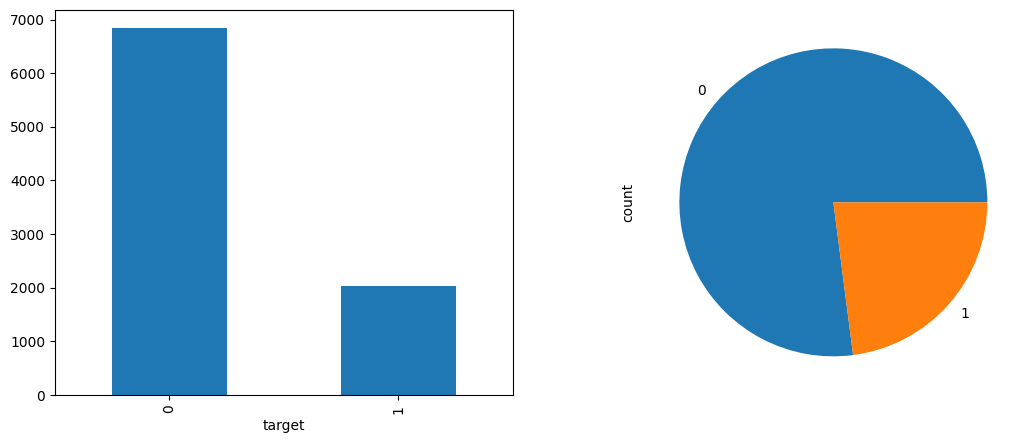

In [38]:
for col in clean_df.select_dtypes('object'):
    plt.figure(figsize=[13,5])

    plt.subplot(1,2,1)
    clean_df[col].value_counts().plot(kind="bar")
    
    plt.subplot(1,2,2)
    clean_df[col].value_counts().plot.pie()
